# Math 3790 W01
# Face Recognition
# Yuge Xu
# 1194170

## Import libraries

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import math

# Confirm number of people in database (38 different people), then confirm each person has how many photos
# Then display what does the dataset looks like

num_of_people = 38

yaleB01 person contains 60 photos.
yaleB02 person contains 58 photos.
yaleB03 person contains 60 photos.
yaleB04 person contains 59 photos.
yaleB05 person contains 57 photos.
yaleB06 person contains 57 photos.
yaleB07 person contains 64 photos.
yaleB08 person contains 64 photos.
yaleB09 person contains 64 photos.
yaleB10 person contains 64 photos.
yaleB11 person contains 54 photos.
yaleB12 person contains 59 photos.
yaleB13 person contains 53 photos.
yaleB14 person contains 64 photos.
yaleB15 person contains 63 photos.
yaleB16 person contains 62 photos.
yaleB17 person contains 63 photos.
yaleB18 person contains 63 photos.
yaleB19 person contains 64 photos.
yaleB20 person contains 64 photos.
yaleB21 person contains 64 photos.
yaleB22 person contains 64 photos.
yaleB23 person contains 64 photos.
yaleB24 person contains 64 photos.
yaleB25 person contains 64 photos.
yaleB26 person contains 60 photos.
yaleB27 person contains 64 photos.
yaleB28 person contains 57 photos.


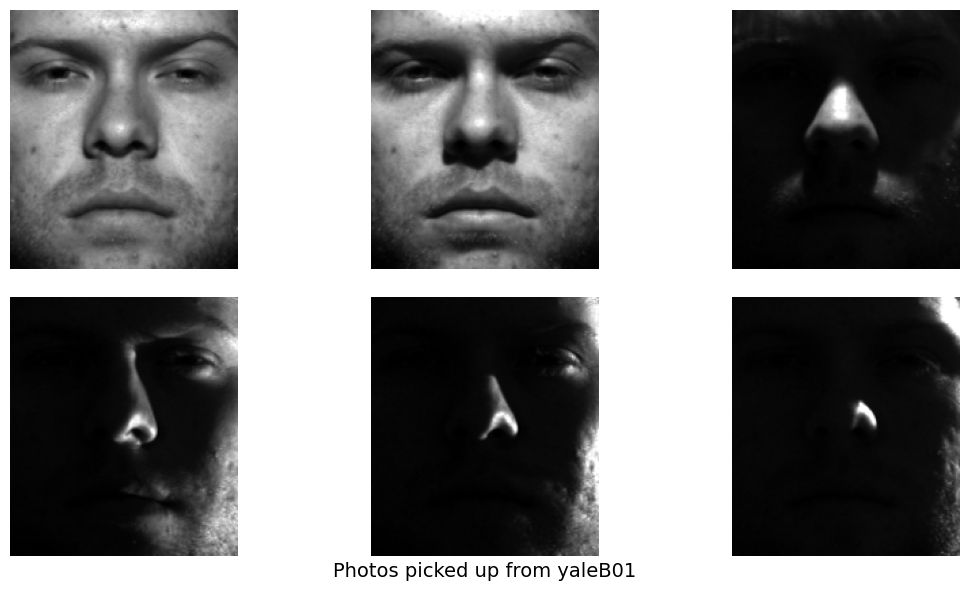

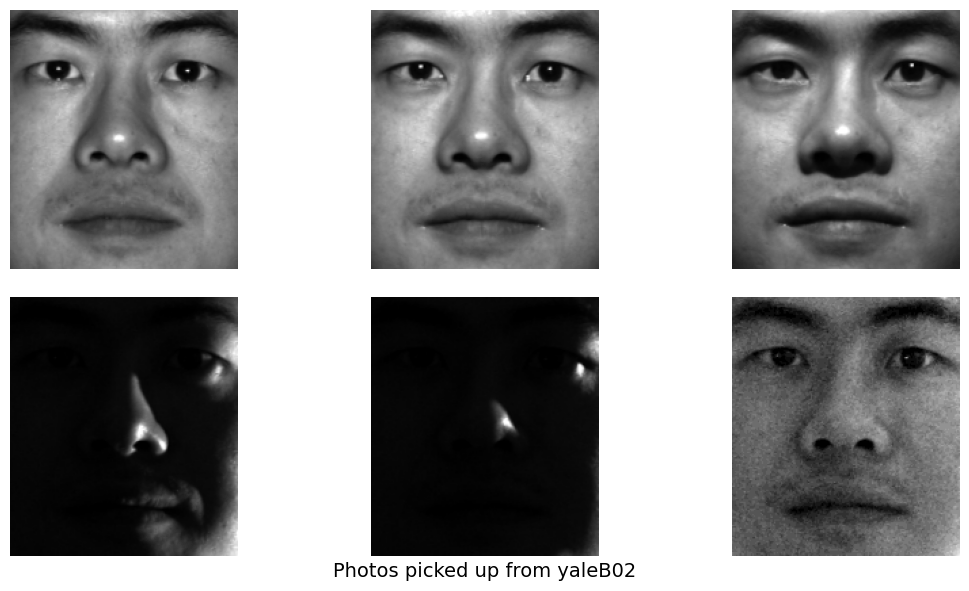

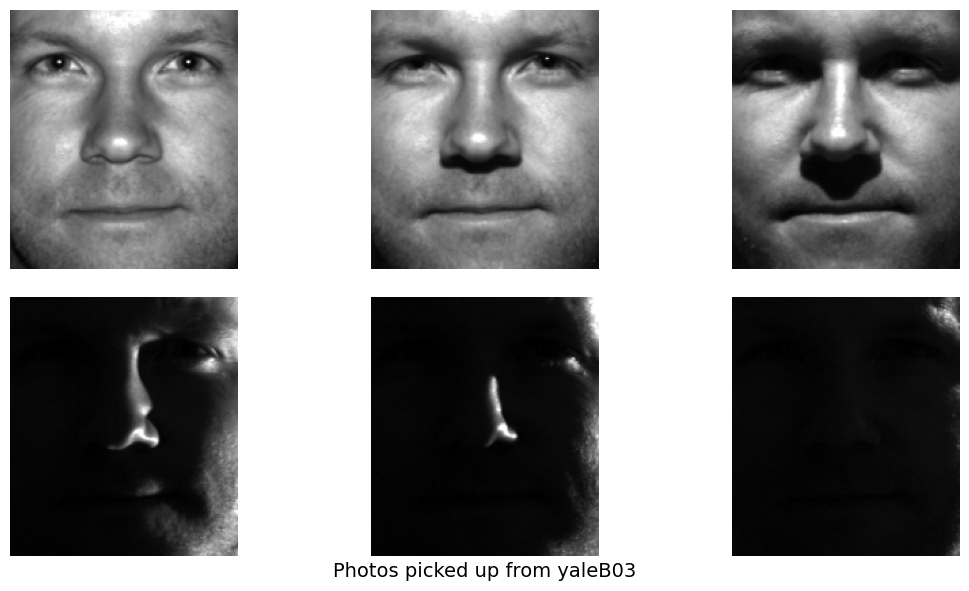

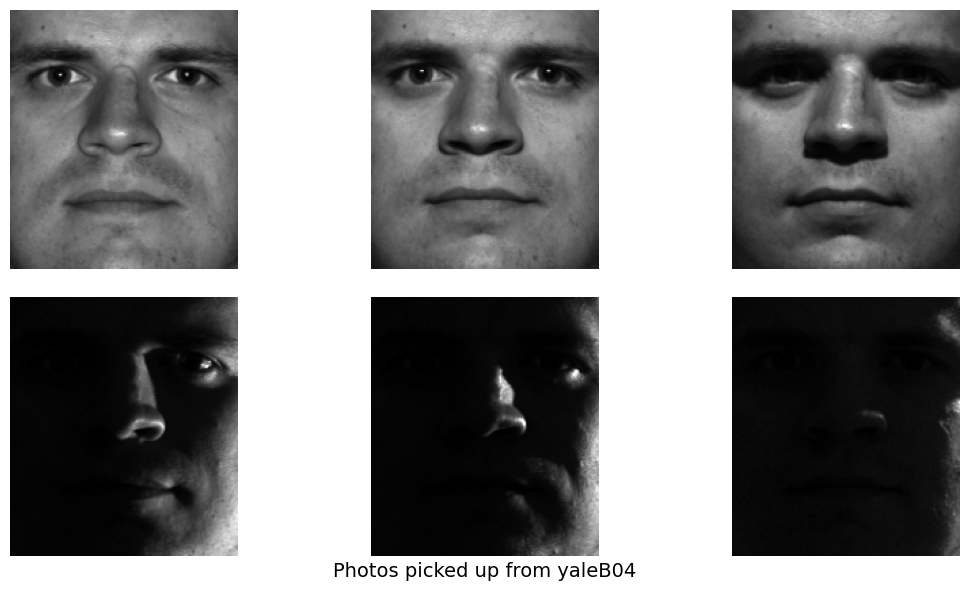

In [60]:
# the folder path for our face datasets
folder_path = "CroppedYale"

# list all folders in the database, images in one folder belongs to one person
all_items = os.listdir(folder_path)
subfolder_count = 0

# count number of person
for item in all_items:  
    if os.path.isdir(os.path.join(folder_path, item)):
        subfolder_count += 1
num_of_people = subfolder_count 
print(f"num_of_people = {num_of_people}\n")

# list all subfolders'name in the dataset.
folder_names =[
    "yaleB01", "yaleB02", "yaleB03", "yaleB04", "yaleB05",
    "yaleB06", "yaleB07", "yaleB08", "yaleB09", "yaleB10",
    "yaleB11", "yaleB12", "yaleB13", "yaleB14", "yaleB15",
    "yaleB16", "yaleB17", "yaleB18", "yaleB19", "yaleB20",
    "yaleB21", "yaleB22", "yaleB23", "yaleB24", "yaleB25",
    "yaleB26", "yaleB27", "yaleB28", "yaleB29", "yaleB30",
    "yaleB31", "yaleB32", "yaleB33", "yaleB34", "yaleB35",
    "yaleB36", "yaleB37", "yaleB38"
]
#  Initialize an array called "photos_count_per_people" to record the number of respective photos in each subfolder
photos_count_per_people = np.empty(num_of_people)

for i, subfolder in enumerate(folder_names):
    subfolder_path = os.path.join(folder_path, subfolder)
    files = os.listdir(subfolder_path)
    photo_count = 0
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg") or file.endswith(".pgm"):
            photo_count += 1
    # Records the number of photos in the "photos_count_per_people" array
    photos_count_per_people[i] = (int)(photo_count)
photos_count_per_people = photos_count_per_people.astype(np.int64)

for subfolder, count in zip(folder_names, photos_count_per_people):
    print(subfolder, "person contains", count, "photos.")


# Set the subsequent drawing size
plt.rcParams['figure.figsize']=[8,8] #pictures are displayed in an 8 × 8 size 
plt.rcParams.update({'font.size':18})#word size are displayed in an font of 18

# For display, suppose we pick up a few photos from the following folder
folder_names = [
    "yaleB01", "yaleB02", "yaleB03", "yaleB04"
]

def display_photos(subfolder, num_photos=3):
    subfolder_path = os.path.join(folder_path, subfolder)
    files = sorted([f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.pgm'))])
    fig, axes = plt.subplots(2, num_photos, figsize=(12, 6))
    fig.text(0.5, 0.01, f'Photos picked up from {subfolder}', horizontalalignment='center', fontsize=14)
        
    # Display the first 3 photos of each person/subfolder
    for i, file in enumerate(files[:num_photos]):
        img_path = os.path.join(subfolder_path, file)
        img = Image.open(img_path).convert('L') 
        axes[0, i].imshow(img, cmap='gray')  
        axes[0, i].axis('off')
    
    # Display the last 3 photos of each person/subfolder
    for i, file in enumerate(files[-num_photos:]):
        img_path = os.path.join(subfolder_path, file)
        img = Image.open(img_path).convert('L')  
        axes[1, i].imshow(img, cmap='gray')  
        axes[1, i].axis('off')    
    plt.tight_layout()
    plt.show()


for subfolder in folder_names:
    display_photos(subfolder)

    

# Feature Enigneering

In [61]:
# In the following part
# we will use matrix 'faces' to store all the training faces. 
#The first column of the matrix is person1's 1st face, and the second column is person1's the 2nd face...
# The last column of the matrix is person38's 61th face.

# Initializes an empty vector_list to store the vectors of all images
vectors_list = []
folder_names =[
    "yaleB01", "yaleB02", "yaleB03", "yaleB04", "yaleB05",
    "yaleB06", "yaleB07", "yaleB08", "yaleB09", "yaleB10",
    "yaleB11", "yaleB12", "yaleB13", "yaleB14", "yaleB15",
    "yaleB16", "yaleB17", "yaleB18", "yaleB19", "yaleB20",
    "yaleB21", "yaleB22", "yaleB23", "yaleB24", "yaleB25",
    "yaleB26", "yaleB27", "yaleB28", "yaleB29", "yaleB30",
    "yaleB31", "yaleB32", "yaleB33", "yaleB34", "yaleB35",
    "yaleB36", "yaleB37", "yaleB38"
]


parent_directory = 'CroppedYale'  

for folder_name in folder_names:
    folder_path = os.path.join(parent_directory, folder_name)
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # Traverse all image files of each subfolder/person
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp','.pgm')):  
                image_path = os.path.join(folder_path, filename)
                try:
                    # open the image
                    image = Image.open(image_path)
                    
                    # reshape the size to 100*100
                    image = image.resize((100, 100))
                    
                    # convert it to grayscale image
                    gray_image = image.convert('L')
                    
                    # convert it to grayscale matrix
                    gray_matrix = np.array(gray_image)
                    
                    # convert it to grayscale vector
                    vector = gray_matrix.flatten()
                    
                    # append each vector into vector list
                    vectors_list.append(vector)
                except IOError:
                    print(f"Cannot open the {image_path}")

# assign the value of vector_lists to matrix 'faces'
faces = np.array(vectors_list).T
num_faces_used_for_training = 2315
train_face = faces[:,:num_faces_used_for_training]
print(f"the shape of matrix 'train_face' = {train_face.shape}")

the shape of matrix 'train_face' = (10000, 2315)


# Calculate avg face and plot avg face

shape of avg_face = (10000,)


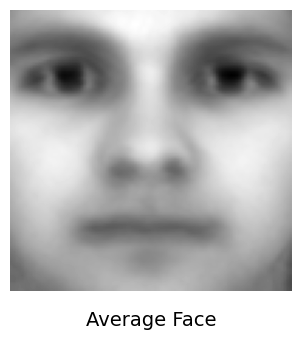

In [62]:
avg_face = np.mean(train_face,axis=1)
print(f"shape of avg_face = {avg_face.shape}")

#plot avg face
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face, (100, 100))) 
img_avg.set_cmap('gray')
plt.axis('off')
plt.text(0.5, -0.1, 'Average Face', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax1.transAxes)
plt.show()

# Calculate first demean face and plot demean face

shape of demean_face = (10000,)


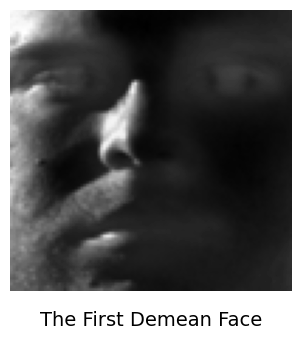

In [63]:
demean_face = train_face[:,0]-avg_face
print(f"shape of demean_face = {demean_face.shape}")

#plot the first demean face
p1_demean_face = plt.figure()
ax_demean = p1_demean_face.add_subplot(121)
img_avg = ax_demean.imshow(np.reshape(demean_face, (100, 100))) 
img_avg.set_cmap('gray')
plt.axis('off')
plt.text(0.5, -0.1, 'The First Demean Face', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax_demean.transAxes)
plt.show()

## Find Eigenfaces using Covaraiance Matrix (Method1)

In [64]:
# X is the demean face matrix
X = train_face-np.tile(avg_face,(train_face.shape[1],1)).T
print(f"shape of demean face matrix X = {X.shape}")


# Build covaraiance matrix
cov_matrix = np.cov(X,rowvar = True)
print(f"shape of cov_matrix = {cov_matrix.shape}")

# Find the Eigenvectors of covaraince matrix, each eigen vector is atcually an eigenface
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


shape of demean face matrix X = (10000, 2315)
shape of cov_matrix = (10000, 10000)


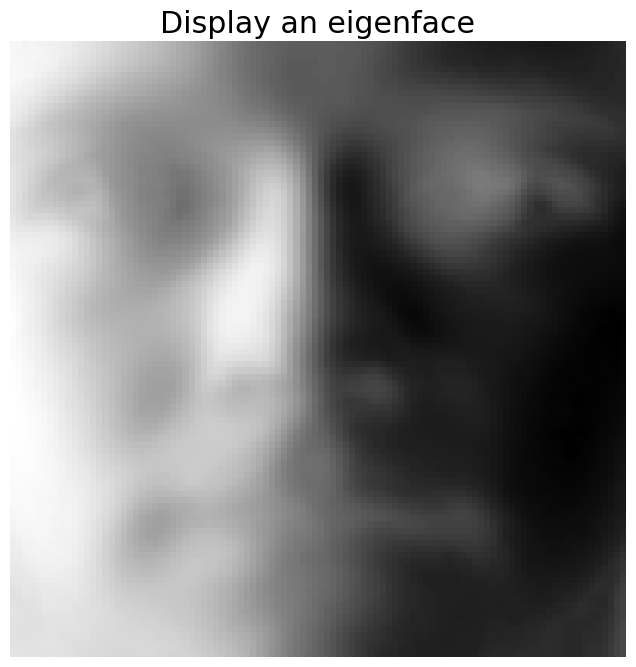

In [65]:
# plot an eigenface
eigenface = eigenvectors[:,9998:9999].reshape((100, 100))
plt.imshow(eigenface, cmap='gray')
plt.title("Display an eigenface")
plt.axis('off')
plt.show()

In [66]:
#The eigenvalues and eigenvector matrices are arranged in order from smallest to largest, 
#so if we need to choose the first 100 most important principal components, we directly select the last 100 columns of the eigenvector
num_components =  1000

# Each column in projection_matrix is a eigen-vector,represents as a principal component
projection_matrix = eigenvectors[:, -num_components:]
print(f"shape of projection matrix = {projection_matrix.shape}")

#Project original demean face matrix X into a low-dimension X_pca
#X_pca = Transpose of projection_matrix * X

X_pca = (projection_matrix.T)@X

print(f"shape of X_pca = {X_pca.shape}")
print(f"Now,each image can be represented in a {num_components}-dimension eigenspace")

shape of projection matrix = (10000, 1000)
shape of X_pca = (1000, 2315)
Now,each image can be represented in a 1000-dimension eigenspace


## Input Test faces

In [67]:
test_folder_path = 'CroppedYaleTest'  
files = os.listdir(test_folder_path)
image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp', '.pgm']
image_count = sum(file.lower().endswith(tuple(image_extensions)) for file in files)
print(f"CroppedYaleTest has a number of {image_count} test_images")

files = sorted(os.listdir(test_folder_path))
vectors_list = []
test_real_label = []
for filename in files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp','.pgm')):  
        image_path = os.path.join(test_folder_path, filename)
        try:
            test_real_label.append(filename)
            #open the image
            image = Image.open(image_path)     
            # resize the image to 100*100
            resized_image = image.resize((100, 100))
            # convert to gray images
            gray_image = resized_image.convert('L')
            # then convert to gray image matrix
            gray_matrix = np.array(gray_image)
            vector = gray_matrix.flatten()
            vectors_list.append(vector)
        except IOError:
            print(f"Cannot open {image_path}")
test_face_matrix = np.array(vectors_list).T


print(f"shape of test_face_matrix = {test_face_matrix.shape}")


for i in range(len(test_real_label)):
    test_real_label[i] = test_real_label[i][:7]

print(f"test_real_label = {test_real_label}")
print(f"length of test_real_label array = {len(test_real_label)}\n")

def find_closest_column(train_face_matrix, test_face_vector):
    min_distance = float('inf')  
    closest_column_index = None
    closest_column = None

    vector_matrix = np.tile(test_face_vector, (train_face_matrix.shape[1], 1)).T  

    for i in range(train_face_matrix.shape[1]):  
        column = train_face_matrix[:, i]
        distance = np.linalg.norm(column - vector_matrix[:, i])  
        if distance < min_distance:
            min_distance = distance
            closest_column_index = i
            closest_column = column
            
    
    print("matched_face_index:", closest_column_index)
    print("matched column:", closest_column)
    print("\n")    
    return closest_column_index, closest_column




matched_index_list = []


for i in range(100):
    # find the closest image in the train_face matrix
    print(i)
    closest_column_index, _ = find_closest_column(train_face, test_face_matrix[:, i])
    
    # record the matched index into the list
    matched_index_list.append(closest_column_index)

print("matched_index_list:", matched_index_list)



CroppedYaleTest has a number of 100 test_images
shape of test_face_matrix = (10000, 100)
test_real_label = ['yaleB01', 'yaleB01', 'yaleB01', 'yaleB01', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB03', 'yaleB03', 'yaleB03', 'yaleB03', 'yaleB03', 'yaleB04', 'yaleB04', 'yaleB04', 'yaleB04', 'yaleB04', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB26', 'yaleB26', 'yaleB26', 'yaleB26', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB30', 'yaleB30', 'yaleB30', 'yaleB30', 'yaleB33', 'yaleB33', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', '

In [68]:
class_range = []
count =0
for i in range(num_of_people):
    count = count+photos_count_per_people[i]
    class_range.append(count)
class_range = [element-1 for element in class_range]
print(class_range)
print(f"length of class_range = {len(class_range)}\n")
confirm_class_dictionary = dict()
for i in range(len(class_range)):
    key_val = class_range[i]
    confirm_class_dictionary[key_val] = i
print(f"confirm_class_dictionary = {confirm_class_dictionary}")




def match_result(index):
    class_category = 0
    for i in range(len(class_range)):
        if i==0 and 0<=index<=class_range[0]:
            class_category = confirm_class_dictionary[class_range[0]]
        if i>0 and class_range[i-1]<index<=class_range[i]:
            class_category = confirm_class_dictionary[class_range[i]]
        
    print(f"the image belongs to yaleB{class_category+1}")
    if class_category+1<=9:
        return f"yaleB0{class_category+1}"
    return f"yaleB{class_category+1}"


[59, 117, 177, 236, 293, 350, 414, 478, 542, 606, 660, 719, 772, 836, 899, 961, 1024, 1087, 1151, 1215, 1279, 1343, 1407, 1471, 1535, 1595, 1659, 1716, 1772, 1832, 1896, 1960, 2022, 2075, 2133, 2192, 2253, 2314]
length of class_range = 38

confirm_class_dictionary = {59: 0, 117: 1, 177: 2, 236: 3, 293: 4, 350: 5, 414: 6, 478: 7, 542: 8, 606: 9, 660: 10, 719: 11, 772: 12, 836: 13, 899: 14, 961: 15, 1024: 16, 1087: 17, 1151: 18, 1215: 19, 1279: 20, 1343: 21, 1407: 22, 1471: 23, 1535: 24, 1595: 25, 1659: 26, 1716: 27, 1772: 28, 1832: 29, 1896: 30, 1960: 31, 2022: 32, 2075: 33, 2133: 34, 2192: 35, 2253: 36, 2314: 37}


In [69]:
# create an empty list to store the predict label
test_predict_label = []  

for j in range(len(matched_index_list)):
    # find the matched index belongs to which category/person 
    for i in range(len(class_range)):
        if i == 0 and 0 <= matched_index_list[j] < class_range[0]:
            class_category = i
            break
        elif class_range[i - 1] < matched_index_list[j] < class_range[i]:
            class_category = i
            break
    else:
        class_category = len(class_range)  
    
    test_predict_label.append(class_category + 1)  


for i in range(len(test_predict_label)):
    test_predict_label[i] = 'yaleB' + str(test_predict_label[i])

print("test_predict_label:", test_predict_label)


test_predict_label: ['yaleB10', 'yaleB10', 'yaleB1', 'yaleB10', 'yaleB13', 'yaleB2', 'yaleB10', 'yaleB39', 'yaleB13', 'yaleB2', 'yaleB3', 'yaleB3', 'yaleB3', 'yaleB3', 'yaleB13', 'yaleB3', 'yaleB4', 'yaleB3', 'yaleB10', 'yaleB3', 'yaleB13', 'yaleB13', 'yaleB5', 'yaleB5', 'yaleB5', 'yaleB13', 'yaleB13', 'yaleB10', 'yaleB29', 'yaleB10', 'yaleB10', 'yaleB10', 'yaleB6', 'yaleB10', 'yaleB29', 'yaleB19', 'yaleB29', 'yaleB10', 'yaleB10', 'yaleB10', 'yaleB37', 'yaleB35', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB35', 'yaleB13', 'yaleB13', 'yaleB10', 'yaleB10', 'yaleB28', 'yaleB29', 'yaleB16', 'yaleB10', 'yaleB13', 'yaleB10', 'yaleB28', 'yaleB37', 'yaleB37', 'yaleB29', 'yaleB37', 'yaleB31', 'yaleB38', 'yaleB35', 'yaleB10', 'yaleB3', 'yaleB30', 'yaleB39', 'yaleB10', 'yaleB10', 'yaleB10', 'yaleB29', 'yaleB39', 'yaleB34', 'yaleB13', 'yaleB10', 'yaleB10', 'yaleB10', 'yaleB10', 'yaleB13', 'yaleB10', 'yaleB2', 'yaleB3', 'yaleB3', 'yaleB39', 'yaleB7', 'yaleB23', 'yaleB23', 'yaleB29', 'yaleB29'

In [70]:

files = os.listdir(test_folder_path)
vectors_list = []

test_real_label = []
num_of_test_images= 0
count = 0
accurate_count = 0

for filename in files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp','.pgm')):  
        image_path = os.path.join(test_folder_path, filename)
        num_of_test_images = num_of_test_images +1
        try:

            test_real_label.append(filename)
            

            image = Image.open(image_path)
            

            resized_image = image.resize((100, 100))
            

            gray_image = resized_image.convert('L')
            

            gray_matrix = np.array(gray_image)
            

            vector = gray_matrix.flatten()


            vector = vector-avg_face


            new_face_projected = (projection_matrix.T) @ vector
            
            print(count)
            count = count+1
            idx,col = find_closest_column(X_pca, new_face_projected)

            
            print(f"test_real_label:{filename}")
            match_str = match_result(idx)
            if(match_str==filename[:7]):
                accurate_count = accurate_count+1
            vectors_list.append(vector)

            

        except IOError:
            print(f"fail to open {image_path}")


test_face_matrix = np.array(vectors_list).T


print(test_face_matrix.shape)


print(len(test_real_label))


0
matched_face_index: 135
matched column: [ 2.57729688e+00 -1.27838903e+00  1.07922138e+01  8.70786635e+00
 -2.85716977e+00  1.10890171e+01  5.18863116e+00 -4.08166803e+00
 -6.04418813e+00  3.73433999e+00 -1.00422092e+01  1.55697548e+01
 -1.39984698e+00 -1.01033876e+01 -4.09070003e+00 -2.40551010e+00
 -1.36933372e+00  6.13277990e+00  1.23773674e+00 -1.52319336e+00
 -1.55406951e+00 -4.90321178e+00 -1.27545188e+01 -2.14079193e+00
  8.26414672e+00  5.96122042e+00  8.69444019e-01  3.48182699e+00
 -6.44052953e+00  6.76970759e+00 -9.55587484e-01  7.17146393e+00
 -2.59285252e+01  4.42061507e+00  1.37694717e+01 -3.92487033e+00
  9.46793519e+00 -1.94061360e+01  8.07891259e+00 -1.47113296e+01
 -7.59173698e+00  5.85419387e+00  1.27032784e+01 -9.97615367e+00
  5.69780044e+00  1.04792807e+01  4.56658248e+00  2.82603365e+00
 -1.28863843e+01 -1.68325100e+01 -1.86349264e+00 -1.63816267e+00
  2.18553798e+00 -1.11826181e+01  1.65551900e+01  9.60014530e+00
  2.68791209e+00 -2.42779994e+00 -4.91009882e-01

In [71]:
print(f"accuracy = {accurate_count/num_of_test_images}")

accuracy = 0.92


## Use one test face to show the matching process

test_image_matrix shape = (100, 100)
test_image_vector shape = (10000,)
shape of new_face_projected = (1000,)
matched_face_index: 81
matched column: [ 3.38259942e+00  2.38739548e+00  1.21859672e+01 -5.84400875e+00
  1.08929383e-01 -5.55205867e+00 -1.20743882e+01 -4.00748939e-01
 -4.24113412e+00  1.13573071e+01  3.79909146e+00 -5.20997316e+00
  1.19929362e+01 -3.34581379e+00  1.64503309e+00  5.37483036e+00
 -9.86383087e+00 -1.04740572e+01 -7.59691989e+00  6.14626945e+00
  1.23459802e+01 -2.28406880e+00 -4.78309340e-01  9.20362070e+00
  4.04337434e+00 -9.28153327e+00 -4.10195908e-01  8.93942815e+00
 -1.68355709e+00  3.08524565e+00 -2.46875237e+00  2.26758711e+01
  3.75043697e-01 -5.19501794e+00 -4.42944962e+00  4.52238178e+00
  6.90668079e+00  4.45688902e+00 -8.59325557e+00 -1.68534522e+01
  1.56125931e+01 -1.87663725e+01 -4.05802857e+00 -8.69253003e-02
 -6.23040271e+00  4.63607033e+00  4.58746558e+00 -2.97169289e+00
 -1.27832537e+00 -3.35361823e-01  1.66139001e+00 -4.46123621e-01
  7.38

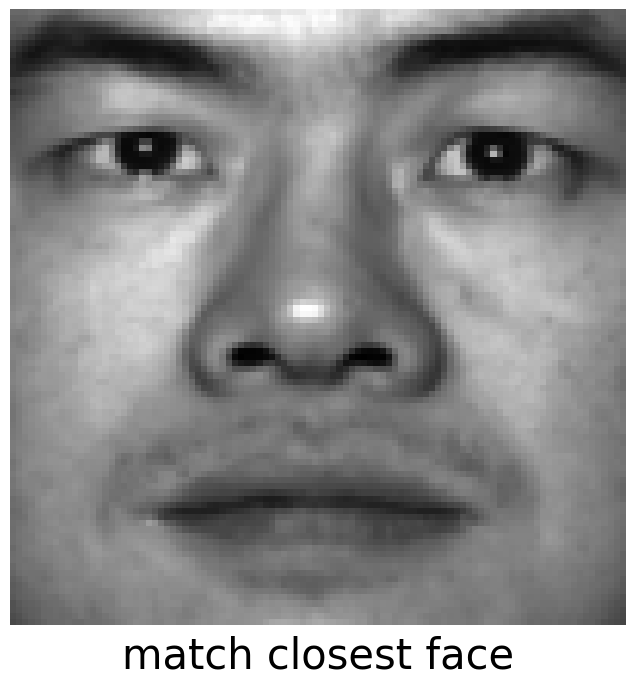

[60, 118, 178, 237, 294, 351, 415, 479, 543, 607, 661, 720, 773, 837, 900, 962, 1025, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1596, 1660, 1717, 1773, 1833, 1897, 1961, 2023, 2076, 2134, 2193, 2254, 2315]
length of class_range = 38
the image belongs to yaleFace2


In [72]:
test_image = Image.open('CroppedYaleTest/yaleB02_P00A+010E+00.pgm')
test_image = test_image.convert('L')
test_image = test_image.resize((100,100))
test_image_matrix = np.array(test_image)
print(f"test_image_matrix shape = {test_image_matrix.shape}")
test_image_vector = test_image_matrix.flatten()
print(f"test_image_vector shape = {test_image_vector.shape}")
test_image_vector = test_image_vector-avg_face
new_face_projected = (projection_matrix.T) @ test_image_vector
print(f"shape of new_face_projected = {new_face_projected.shape}")

index,match_matrix = find_closest_column(X_pca,new_face_projected)

# Display the image
img = plt.imshow(np.reshape(train_face[:,index], (100, 100)), cmap='gray')
plt.axis('off')

# Add text below the image
plt.text(0.5, -0.05, 'match closest face', horizontalalignment='center', verticalalignment='center',fontsize=30, transform=img.axes.transAxes)

plt.show()

photos_count_per_people.shape

class_range = []
count =0
for i in range(num_of_people):
    count = count+photos_count_per_people[i]
    class_range.append(count)


print(class_range)
print(f"length of class_range = {len(class_range)}")

class_range = [element-1 for element in class_range]

confirm_class_dictionary = dict()
for i in range(len(class_range)):
    key_val = class_range[i]
    confirm_class_dictionary[key_val] = i

class_category = 0
for i in range(len(class_range)):
    if i==0 and 0<=index<=class_range[0]:
        class_category = confirm_class_dictionary[class_range[0]]
    if i>0 and class_range[i-1]<index<=class_range[i]:
        class_category = confirm_class_dictionary[class_range[i]]
    
print(f"the image belongs to yaleFace{class_category+1}")
        


## Find Enigenfaces using Singular Value Decomposition (method2)

## Singular Value Decomposition

In [73]:
X = train_face-np.tile(avg_face,(train_face.shape[1],1)).T
U,S,VT = np.linalg.svd(X,full_matrices=0)
print(f"X.shape = {X.shape}")
print(f"U.shape = {U.shape}")
print(f"S.shape = {S.shape}")
print(f"VT.shape = {VT.shape}")

X.shape = (10000, 2315)
U.shape = (10000, 2315)
S.shape = (2315,)
VT.shape = (2315, 2315)


## plot average face

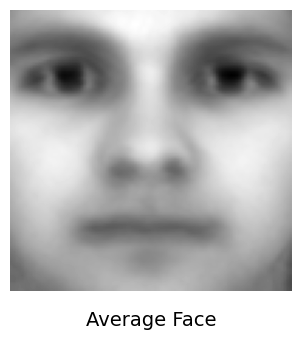

In [74]:
# plot the average face
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face, (100, 100))) 
img_avg.set_cmap('gray')
plt.axis('off')
plt.text(0.5, -0.1, 'Average Face', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax1.transAxes)
plt.show()

## plot an eigen face

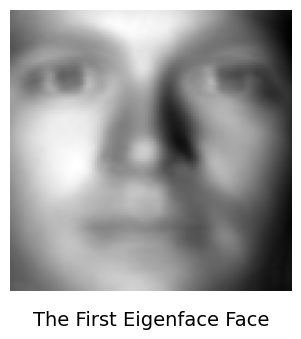

In [75]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(121)
img_avg = ax2.imshow(np.reshape(U[:,0], (100, 100)))
img_avg.set_cmap('gray')
plt.axis('off')
plt.text(0.5, -0.1, 'The First Eigenface Face', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax2.transAxes)
plt.show()

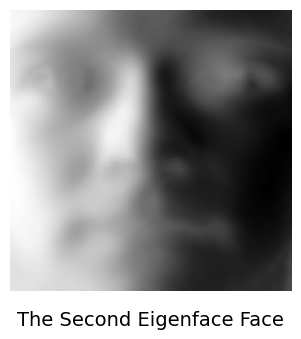

In [76]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(121)
img_avg = ax3.imshow(np.reshape(U[:,1], (100, 100)))
img_avg.set_cmap('gray')
plt.axis('off')
plt.text(0.5, -0.1, 'The Second Eigenface Face', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax3.transAxes)
plt.show()

# Input an test image and show the matching process

In [77]:
# This test_image is added with some noise
test_image = Image.open('CroppedYaleTest/yaleB03_P00A+070E+45_noise.pgm')
test_image = test_image.convert('L')
test_image = test_image.resize((100,100))
test_image_matrix = np.array(test_image)
print(f"test_image_matrix shape = {test_image_matrix.shape}")
test_image_vector = test_image_matrix.flatten()
print(f"test_image_vector shape = {test_image_vector.shape}")

test_image_matrix shape = (100, 100)
test_image_vector shape = (10000,)


# Display the test_face image

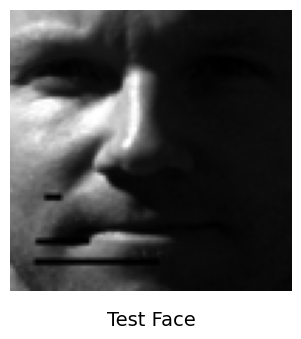

In [78]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(121)
img_avg = ax3.imshow(np.reshape(test_image_vector, (100, 100)))
img_avg.set_cmap('gray')
plt.axis('off')
plt.text(0.5, -0.1, 'Test Face', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax3.transAxes)
plt.show()

## Only use first k eigenfaces to reconstruct our test-face

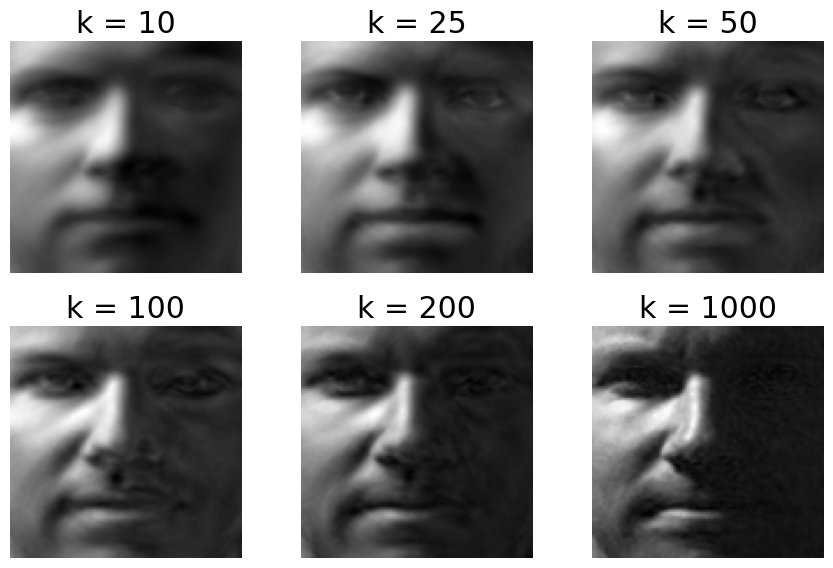

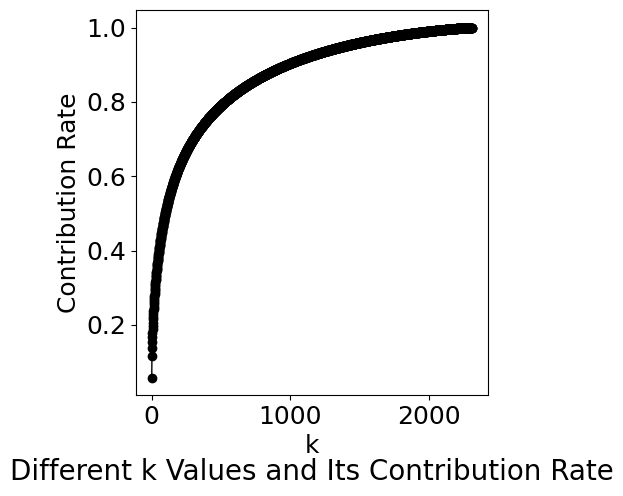

In [79]:
X_test = test_image_vector-avg_face
k_list = [25,50,100,200,500,1000]
test_face_k = None

# Initialize the figure
fig, axs = plt.subplots(2, 3, figsize=(9, 6))

# Loop through each r value
k_list = [10,25,50,100,200,1000]
for i, k in enumerate(k_list):
    # Reconstruct the face
    reconstructed_face = avg_face + U[:, :k] @ (U[:, :k].T @ X_test)
    
    # Plot the reconstructed face
    row_index = i // 3
    col_index = i % 3
    ax = axs[row_index, col_index]
    ax.imshow(np.reshape(reconstructed_face, (100, 100)), cmap='gray')
    ax.set_title('k = ' + str(k))
    ax.axis('off')
    
    test_face_k = reconstructed_face

plt.tight_layout()
plt.show()


# plot first k eigenfaces with their contribution rate
contribution_rate = np.cumsum(S) / np.sum(S)
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.add_subplot(122)
ax1.plot(contribution_rate, '-o', color='k', linewidth=1)
ax1.set_xlabel('k')  
ax1.set_ylabel('Contribution Rate')  
plt.text(0.5, -0.2, 'Different k Values and Its Contribution Rate', ha='center', va='center', fontsize=20, transform=ax1.transAxes)
plt.show()


In [80]:
def find_closest_column(train_face_matrix, test_face_vector):
    min_distance = float('inf')  
    closest_column_index = None
    closest_column = None

    vector_matrix = np.tile(test_face_vector, (train_face_matrix.shape[1], 1)).T  

    for i in range(train_face_matrix.shape[1]): 
        column = train_face_matrix[:, i]
        distance = np.linalg.norm(column - vector_matrix[:, i])  # calculate distance between two vector
        if distance < min_distance:
            min_distance = distance
            closest_column_index = i
            closest_column = column

    print("The index for most matched photo in training database ", closest_column_index)
    print("The column value for most matched photo in training database:", closest_column)
    return closest_column_index, closest_column

The index for most matched photo in training database  174
The column value for most matched photo in training database: [83 91 96 ... 52 52 64]


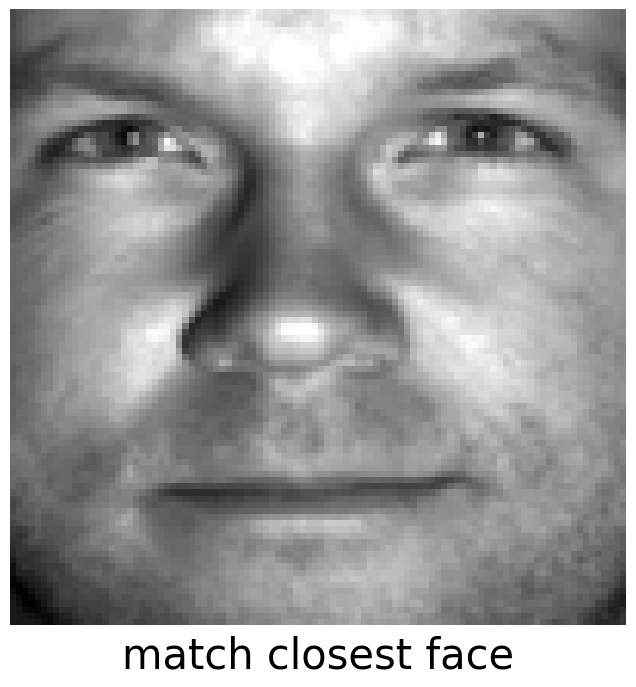

the image belongs to yaleFace3


In [81]:
index,match_matrix = find_closest_column(train_face,test_face_k[0])

# Display the matched image
img = plt.imshow(np.reshape(match_matrix, (100, 100)), cmap='gray')
plt.axis('off')

# Add text below the image
plt.text(0.5, -0.05, 'match closest face', horizontalalignment='center', verticalalignment='center',fontsize=30, transform=img.axes.transAxes)
plt.show()

class_range = []
count =0
for i in range(num_of_people):
    count = count+photos_count_per_people[i]
    class_range.append(count)
class_range = [element-1 for element in class_range]
confirm_class_dictionary = dict()
for i in range(len(class_range)):
    key_val = class_range[i]
    confirm_class_dictionary[key_val] = i
class_category = 0
for i in range(len(class_range)):
    if i==0 and 0<=index<=class_range[0]:
        class_category = confirm_class_dictionary[class_range[0]]
    if i>0 and class_range[i-1]<index<=class_range[i]:
        class_category = confirm_class_dictionary[class_range[i]]    
print(f"the image belongs to yaleFace{class_category+1}")

## Test 100 images

In [99]:
test_folder_path = 'CroppedYaleTest'  
files = sorted(os.listdir(test_folder_path))
vectors_list = []
test_real_label = []
for filename in files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp','.pgm')):  
        image_path = os.path.join(test_folder_path, filename)
        try:
            test_real_label.append(filename)
            image = Image.open(image_path)
            resized_image = image.resize((100, 100))
            gray_image = resized_image.convert('L')
            gray_matrix = np.array(gray_image)
            vector = gray_matrix.flatten()
            vectors_list.append(vector)
        except IOError:
            print(f"Fail to open {image_path}")

test_face_matrix = np.array(vectors_list).T


print(f"shape of test_face_matrix ={test_face_matrix.shape}")
for i in range(len(test_real_label)):
    test_real_label[i] = test_real_label[i][:7]
print(f"test_real_label = {test_real_label}")


def find_closest_column(train_face_matrix, test_face_vector):
    min_distance = float('inf')  
    closest_column_index = None
    closest_column = None

    vector_matrix = np.tile(test_face_vector, (train_face_matrix.shape[1], 1)).T  

    for i in range(train_face_matrix.shape[1]):  
        column = train_face_matrix[:, i]
        distance = np.linalg.norm(column - vector_matrix[:, i])  
        if distance < min_distance:
            min_distance = distance
            closest_column_index = i
            closest_column = column
            
            
    print("The index of most matched image in training database:", closest_column_index)
    print("The column of most matched image in training database:", closest_column)
    return closest_column_index, closest_column



matched_index_list = []
for i in range(100):
    print(i)
    closest_column_index, _ = find_closest_column(train_face, test_face_matrix[:, i])
    matched_index_list.append(closest_column_index)

print("matched_index_list:", matched_index_list)


test_predict_label = [] 

for j in range(len(matched_index_list)):
    
    for i in range(len(class_range)):
        if i == 0 and 0 <= matched_index_list[j] < class_range[0]:
            class_category = i
            break
        elif class_range[i - 1] < matched_index_list[j] < class_range[i]:
            class_category = i
            break
    else:
        class_category = len(class_range) 
    
    test_predict_label.append(class_category + 1) 

for i in range(len(test_predict_label)):
    test_predict_label[i] = 'yaleB' + str(test_predict_label[i])

print("test_predict_label:", test_predict_label)

def match_result(index):
    class_category = 0
    for i in range(len(class_range)):
        if i==0 and 0<=index<=class_range[0]:
            class_category = confirm_class_dictionary[class_range[0]]
        if i>0 and class_range[i-1]<index<=class_range[i]:
            class_category = confirm_class_dictionary[class_range[i]]
        
    print(f"the image belongs to yaleB{class_category+1}")
    if class_category+1<=9:
        return f"yaleB0{class_category+1}"
    return f"yaleB{class_category+1}"



files = os.listdir(test_folder_path)


vectors_list = []


test_real_label = []
num_of_test_images= 0
count = 0
accurate_count = 0

for filename in files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp','.pgm')):  
        image_path = os.path.join(test_folder_path, filename)
        num_of_test_images = num_of_test_images +1
        try:

            test_real_label.append(filename)
            

            image = Image.open(image_path)
            

            resized_image = image.resize((100, 100))
            

            gray_image = resized_image.convert('L')
            

            gray_matrix = np.array(gray_image)
            

            vector = gray_matrix.flatten()


            X_test = vector-avg_face

            
            reconstructed_face = avg_face + U[:,:1000] @ (U[:,:1000].T @ X_test)

            print(count)
            count = count+1
            idx,col = find_closest_column(train_face, reconstructed_face)

            
            print(f"test_real_label:{filename}")
            match_str = match_result(idx)
            if(match_str==filename[:7]):
                accurate_count = accurate_count+1
            vectors_list.append(vector)

            

        except IOError:
            print(f"无法打开文件：{image_path}")


# test_face_matrix = np.array(vectors_list).T        

shape of test_face_matrix =(10000, 100)
test_real_label = ['yaleB01', 'yaleB01', 'yaleB01', 'yaleB01', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB02', 'yaleB03', 'yaleB03', 'yaleB03', 'yaleB03', 'yaleB03', 'yaleB04', 'yaleB04', 'yaleB04', 'yaleB04', 'yaleB04', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB05', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB06', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB11', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB13', 'yaleB26', 'yaleB26', 'yaleB26', 'yaleB26', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB28', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB29', 'yaleB30', 'yaleB30', 'yaleB30', 'yaleB30', 'yaleB33', 'yaleB33', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB34', 'yaleB35', 'yaleB35', 'yaleB

In [100]:
print(f"accuracy = {accurate_count/num_of_test_images}")

accuracy = 0.92
